# Part 1: Getting Aquainted with the Data

In this project, I will be using the `pandas`, `matplotlib`, and `seaborn` Python libraries to explore the relationships present in the data, and create meaningful visualizations that properly tell the stories present in the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

df = pd.read_csv('all_data.csv')
print(df.head(10))

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
5   Chile  2005                              78.4  1.229650e+11
6   Chile  2006                              78.9  1.547880e+11
7   Chile  2007                              78.9  1.736060e+11
8   Chile  2008                              79.6  1.796380e+11
9   Chile  2009                              79.3  1.723890e+11


From a quick glance at the table, the data set provides records on the life expectancy and GDP by year for various countries.

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


There are 96 entries, and none of the entries appear to have null values. The data types for each column also appear to be correct, so no cleaning is necessary in that regard.

In [3]:
print(df.Country.unique())
print(df.Year.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


The data set provides records for 6 different countries over 16 years. The `Life expectancy at birth (years)` column name is cumbersome. It needs to be renamed to make working with the dataset easier. I'll also rename the other columns to keep naming convention more consistent.

In [4]:
df = df.rename({'Country':'country'}, axis='columns')
df = df.rename({'Year':'year'}, axis='columns')
df = df.rename({'Life expectancy at birth (years)':'life_exp'}, axis='columns')
df = df.rename({'GDP':'gdp'}, axis='columns')
df.head()

,country,year,life_exp,gdp
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


The `Country` name for the United States of America is also unwieldy, as it could representation on an axis crowded.

In [6]:
df = df.replace('United States of America', 'USA')
print(df.country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'USA' 'Zimbabwe']


I envision it being helpful for each country to have its dataframe.

In [9]:
chile = df[df.country == 'Chile']
china = df[df.country == 'China']
germany = df[df.country == 'Germany']
mexico = df[df.country == 'Mexico']
usa = df[df.country == 'USA']
zimbabwe = df[df.country == 'Zimbabwe']

# Part 2: Visualizing and Analyzing the Data

In order to explore some of the relationships, the data will need to be visualized. I will start by visualizing the distribution of life expectancy and GDP.

<Figure size 640x480 with 0 Axes>

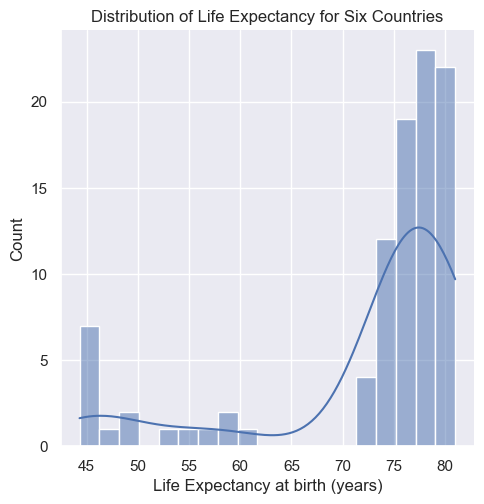

In [16]:
sns.displot(df, x='life_exp', kde=True)
plt.title('Distribution of Life Expectancy for Six Countries')
plt.xlabel('Life Expectancy at birth (years)')
plt.show()
plt.clf()

The distribution of life expectancy appears to be significantly skewed left.

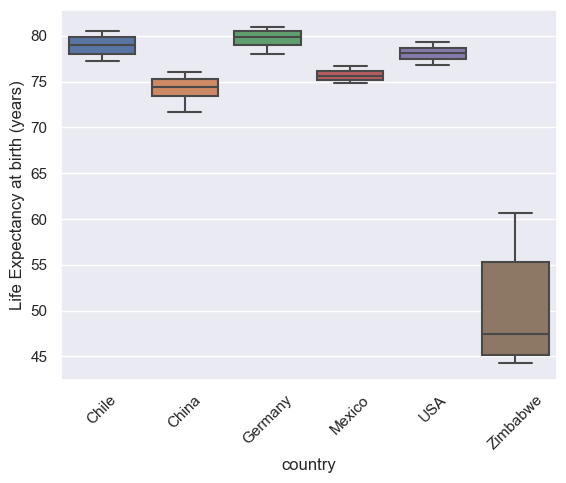

In [17]:
sns.boxplot(x='country', y='life_exp', data=df)
plt.xticks(rotation=45)
plt.ylabel('Life Expectancy at birth (years)')
plt.show()
plt.clf()

The skew in the life expectancy distribution appears to be because of Zimbabwe's low median life expectancy in relation to the other nations in the dataset. Zimbabwe also appears to have the largest range of life expectancies over the 16 years in the sample.

<Figure size 640x480 with 0 Axes>

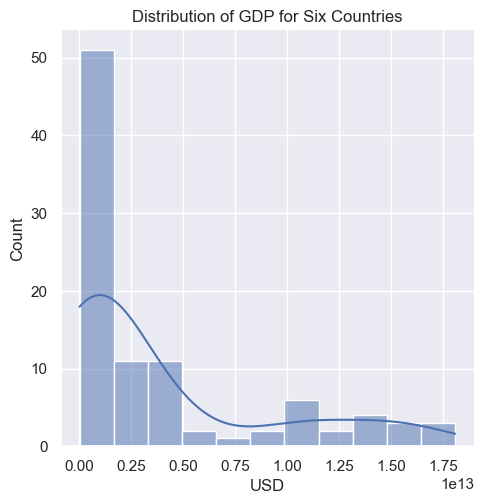

In [18]:
sns.displot(df, x='gdp', kde=True)
plt.title('Distribution of GDP for Six Countries')
plt.xlabel('USD')
plt.show()
plt.clf()

The distribution of GDP appears to be significantly skewed right.

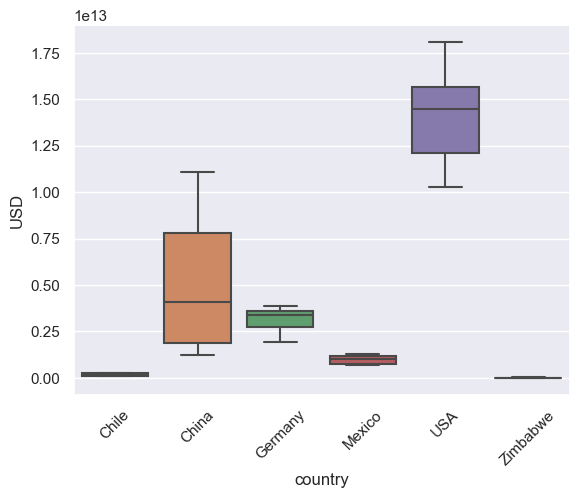

In [19]:
sns.boxplot(x='country', y='gdp', data=df)
plt.xticks(rotation=45)
plt.ylabel('USD')
plt.show()
plt.clf()

The US appears to be causing the skew in the GDP, as it is off on its own in the boxplot. The other countries in the dataset display little variability in their GDP (with the exception of China). Chile and Zimbabwe have such little variation, their box plots are unreadable.

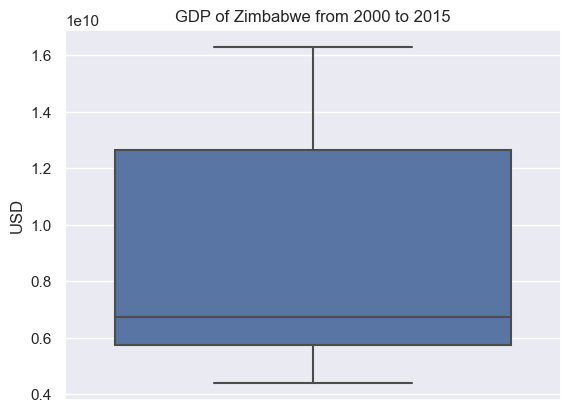

In [20]:
sns.boxplot(y='gdp', data=zimbabwe)
plt.title('GDP of Zimbabwe from 2000 to 2015')
plt.ylabel('USD')
plt.show()
plt.clf()

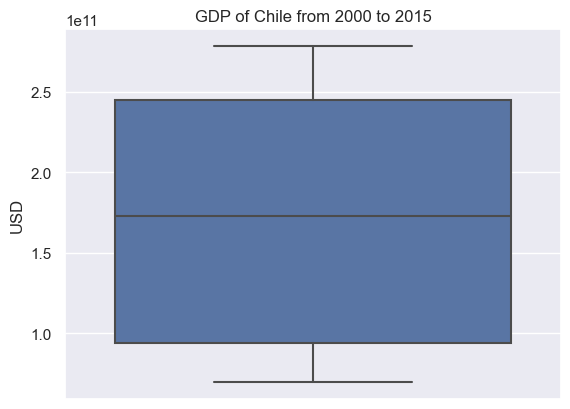

In [21]:
sns.boxplot(y='gdp', data=chile)
plt.title('GDP of Chile from 2000 to 2015')
plt.ylabel('USD')
plt.show()
plt.clf()

How has `life_exp` and `gdp` changed over the years for all countries?

<Figure size 640x480 with 0 Axes>

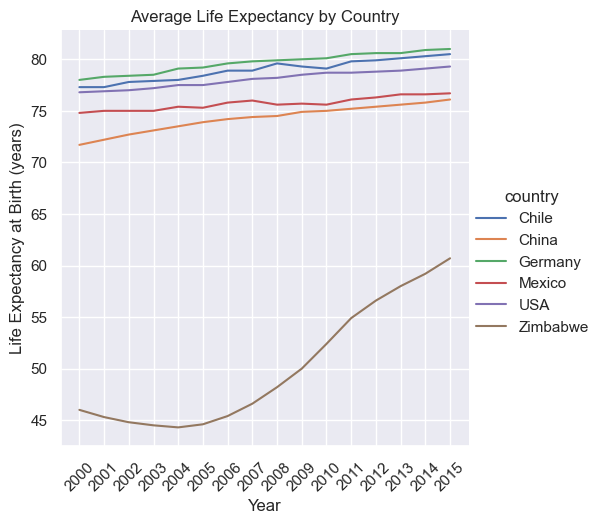

In [22]:
sns.relplot(data=df, x='year', y='life_exp', hue='country', kind='line')
plt.title('Average Life Expectancy by Country')
plt.xticks(range(2000,2016), rotation=45)
plt.xlabel('Year')
plt.ylabel('Life Expectancy at Birth (years)')
plt.show()
plt.clf()

The general life expectancy trend for most countries has been upward over the years in the sample. Zimbabwe had a 5 year period from 2000 to 2004 where it was trending downward, but has rebounded significantly.

<Figure size 640x480 with 0 Axes>

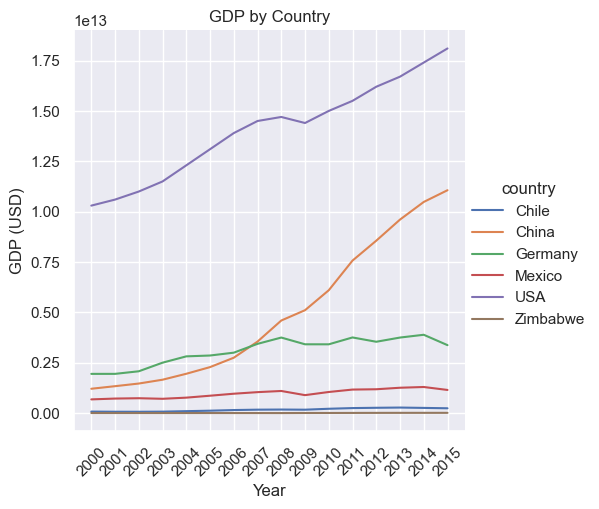

In [23]:
sns.relplot(data=df, x='year', y='gdp', hue='country', kind='line')
plt.title('GDP by Country')
plt.xticks(range(2000,2016), rotation=45)
plt.xlabel('Year')
plt.ylabel('GDP (USD)')
plt.show()
plt.clf()

The US has a sizeable gap between other countries. China had substantial growth from 2006 to 2015, by this particular metric. Germany has bounced back and forth starting in 2008. The other countries appear to have remained fairly constant, though it is difficult to see Chile and Zimbabwe.

<Figure size 640x480 with 0 Axes>

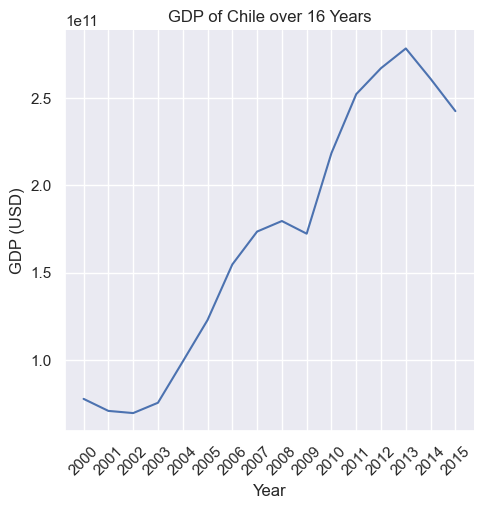

In [24]:
sns.relplot(data=chile, x='year', y='gdp', kind='line')
plt.title('GDP of Chile over 16 Years')
plt.xticks(range(2000,2016), rotation=45)
plt.xlabel('Year')
plt.ylabel('GDP (USD)')
plt.show()
plt.clf()

<Figure size 640x480 with 0 Axes>

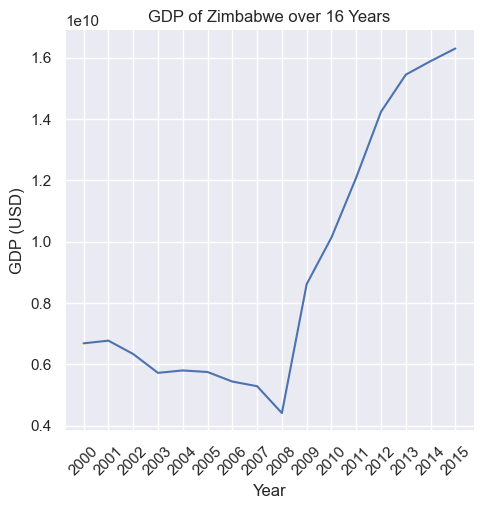

In [25]:
sns.relplot(data=zimbabwe, x='year', y='gdp', kind='line')
plt.title('GDP of Zimbabwe over 16 Years')
plt.xticks(range(2000,2016), rotation=45)
plt.xlabel('Year')
plt.ylabel('GDP (USD)')
plt.show()
plt.clf()

Chile's GDP has trended upward for most years in the sample, though there has been a rather significant decrease from 2013 to 2015.

Zimbabwe trended downward from 2000 to 2008, but has made considerable gains by this particular metric since.

Is there a relationship between `life_exp` and `gdp`?

<Figure size 640x480 with 0 Axes>

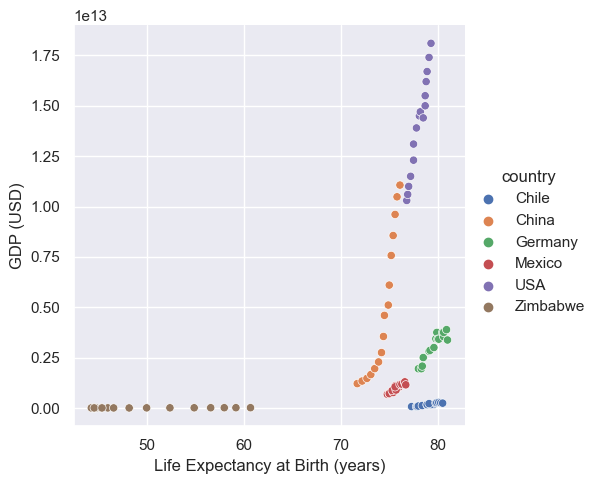

In [26]:
sns.relplot(data=df, x='life_exp', y='gdp', hue='country')
plt.xlabel('Life Expectancy at Birth (years)')
plt.ylabel('GDP (USD)')
plt.show()
plt.clf()

There does appear to be a positive trend for most countries. As `life_exp` increases, so does `gdp`. Zimbabwe appears to be the exception.

In [27]:
print(zimbabwe.year[zimbabwe.gdp == zimbabwe.gdp.min()])
print(zimbabwe.year[zimbabwe.life_exp == zimbabwe.life_exp.min()])

88    2008
Name: year, dtype: int64
84    2004
Name: year, dtype: int64


<Figure size 640x480 with 0 Axes>

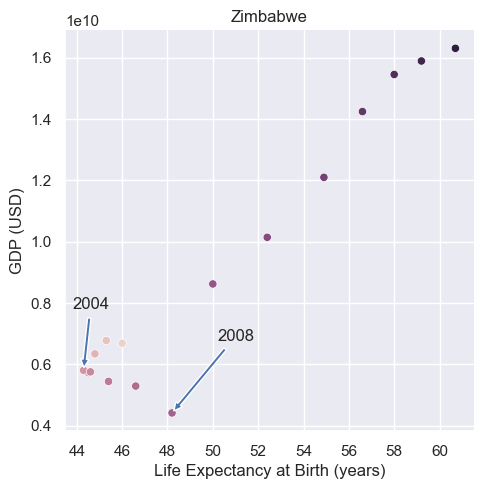

In [28]:
sns.relplot(x='life_exp', y='gdp', hue='year', data=zimbabwe, legend=False)
plt.title('Zimbabwe')
plt.xticks(range(44,62,2))
plt.xlabel('Life Expectancy at Birth (years)')
plt.ylabel('GDP (USD)')
plt.annotate('2004',
             (zimbabwe.life_exp[zimbabwe.year == 2004],
              zimbabwe.gdp[zimbabwe.year == 2004]),
            arrowprops=dict(arrowstyle='simple'),
            xytext=(zimbabwe.life_exp[zimbabwe.year == 2004] - 0.5,
              zimbabwe.gdp[zimbabwe.year == 2004] + 0.2 * 10**10))
plt.annotate('2008',
             (zimbabwe.life_exp[zimbabwe.year == 2008],
              zimbabwe.gdp[zimbabwe.year == 2008]),
            arrowprops=dict(arrowstyle='simple'),
            xytext=(zimbabwe.life_exp[zimbabwe.year == 2008] + 2,
              zimbabwe.gdp[zimbabwe.year == 2001]))
plt.show()
plt.clf()

The scatterplot above includes the hue to illustrate the change over the years. The lighter the color, the earlier. Two points (2004 and 2008) have been annotated to show the years in which the life expectancy and GDP were at their lowest over the course of the years sampled.

From 2008 on, there is a positive trend to the life expectancy and GDP in Zimbabwe.

<Figure size 640x480 with 0 Axes>

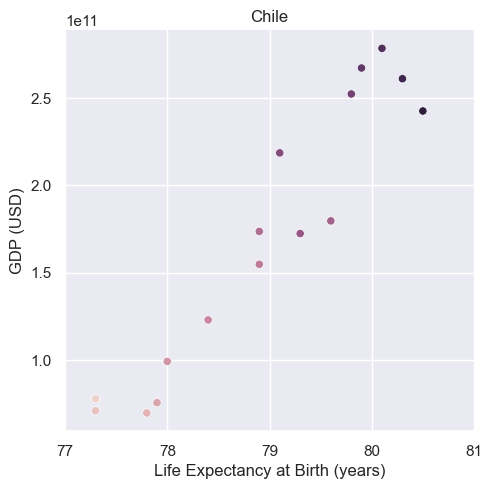

In [29]:
sns.relplot(x='life_exp', y='gdp', hue='year', data=chile, legend=False)
plt.title('Chile')
plt.xlabel('Life Expectancy at Birth (years)')
plt.xticks(range(77,82))
plt.ylabel('GDP (USD)')
plt.show()
plt.clf()

# TESTING AREA

This is where code I want to test or maybe use later will be stored.

In [ ]:
chile_mean_life_exp = round(chile['life_exp'].mean(), 1)
china_mean_life_exp = round(china['life_exp'].mean(), 1)
germany_mean_life_exp = round(germany['life_exp'].mean(), 1)
mexico_mean_life_exp = round(mexico['life_exp'].mean(), 1)
usa_mean_life_exp = round(usa['life_exp'].mean(), 1)
zimbabwe_mean_life_exp = round(zimbabwe['life_exp'].mean(), 1)

chile_med_life_exp = round(chile['life_exp'].median(), 1)
china_med_life_exp = round(china['life_exp'].mean(), 1)
germany_med_life_exp = round(germany['life_exp'].mean(), 1)
mexico_med_life_exp = round(mexico['life_exp'].mean(), 1)
usa_med_life_exp = round(usa['life_exp'].mean(), 1)
zimbabwe_med_life_exp = round(zimbabwe['life_exp'].mean(), 1)

chile_mean_gdp = round(chile['GDP'].mean(), 1)
china_mean_gdp = round(china['GDP'].mean(), 1)
germany_mean_gdp = round(germany['GDP'].mean(), 1)
mexico_mean_life_gdp = round(mexico['GDP'].mean(), 1)
usa_mean_gdp = round(usa['GDP'].mean(), 1)
zimbabwe_mean_gdp = round(zimbabwe['GDP'].mean(), 1)

chile_med_gdp = round(chile['GDP'].median(), 1)
china_med_gdp = round(china['GDP'].mean(), 1)
germany_med_gdp = round(germany['GDP'].mean(), 1)
mexico_med_gdp = round(mexico['GDP'].mean(), 1)
usa_med_gdp = round(usa['GDP'].mean(), 1)
zimbabwe_med_gdp = round(zimbabwe['GDP'].mean(), 1)

print('Summary for Chile:')
print(chile.describe())
print('\nSummary for China:')
print(china.describe())
print('\nSummary for Germany:')
print(germany.describe())
print('\nSummary for Mexico:')
print(mexico.describe())
print('\nSummary for USA:')
print(usa.describe())
print('\nSummary for Zimbabwe:')
print(zimbabwe.describe())
print('\n')